# Mushroom Dataset - EDA, SVM Implementation, and Hyperparameter Tuning

**Contents:**

1. Load dataset & basic exploration
2. Exploratory Data Analysis (histograms, boxplots / density via bar plots for categoricals)
3. Correlation / association analysis (Cramér's V)
4. Preprocessing (encoding, train/test split, scaling)
5. Visualizations (PCA 2D scatter, class balance)
6. SVM implementation (train, evaluate, confusion matrix, classification report)
7. Hyperparameter tuning (GridSearchCV for kernels and C)
8. Comparison of kernels



In [1]:
# 1. Imports and load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

# Display settings
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 60)

# Load dataset
df = pd.read_csv('mushroom.csv')
print('Dataset shape:', df.shape)
df.head()


Dataset shape: (2000, 26)


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,cup,smooth,silky,gray,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,rooted,silky,silky,cinnamon,brown,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,cup,scaly,silky,yellow,gray,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,club,smooth,scaly,yellow,pink,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,missing,fibrous,scaly,gray,white,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [2]:
# 2. Basic exploration
print('Columns:', df.columns.tolist())
print('\nClass distribution:')
print(df.iloc[:,0].value_counts())  # often 'class' is first column
print('\nData sample:')
display(df.sample(5))


Columns: ['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat', 'class', 'stalk_height', 'cap_diameter']

Class distribution:
Unnamed: 0
223     8
182     8
595     7
1060    7
1154    7
       ..
1032    1
573     1
261     1
1098    1
481     1
Name: count, Length: 976, dtype: int64

Data sample:


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
1166,375,flat,scaly,yellow,yes,foul,attached,distant,broad,green,tapering,rhizomorphs,smooth,silky,cinnamon,gray,universal,yellow,one,sheathing,yellow,scattered,paths,edible,11.993500,17.471167
608,37,convex,grooves,pink,no,none,attached,close,narrow,black,enlarging,rhizomorphs,smooth,scaly,orange,brown,universal,brown,one,none,purple,solitary,grasses,edible,10.090078,17.345883
691,464,sunken,smooth,gray,yes,anise,attached,close,narrow,orange,enlarging,bulbous,silky,fibrous,buff,yellow,universal,brown,none,sheathing,white,scattered,waste,edible,12.926922,13.500621
663,1181,flat,smooth,yellow,no,creosote,attached,close,broad,red,enlarging,missing,silky,fibrous,yellow,white,universal,brown,none,zone,chocolate,several,meadows,edible,5.038459,20.622380
1965,655,convex,fibrous,yellow,yes,pungent,attached,crowded,broad,yellow,enlarging,club,silky,scaly,yellow,orange,partial,orange,none,zone,brown,scattered,woods,edible,12.696748,15.311915


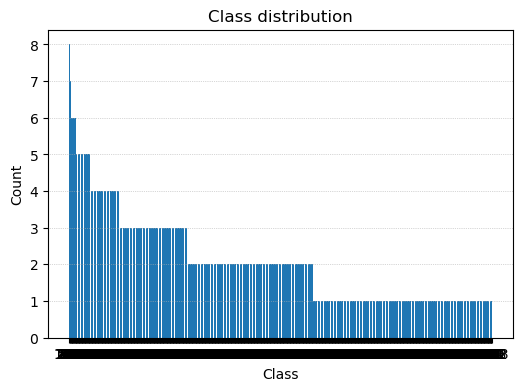

In [3]:
# 3. Class balance visualization
classes = df.iloc[:,0].value_counts()
plt.figure(figsize=(6,4))
plt.bar(classes.index.astype(str), classes.values)
plt.title('Class distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(axis='y', linestyle=':', linewidth=0.5)
plt.show()


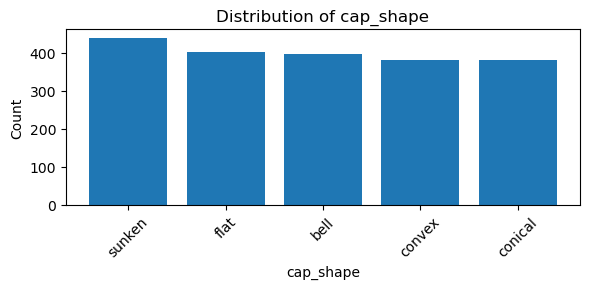

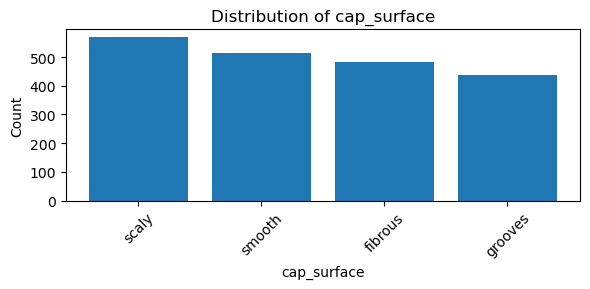

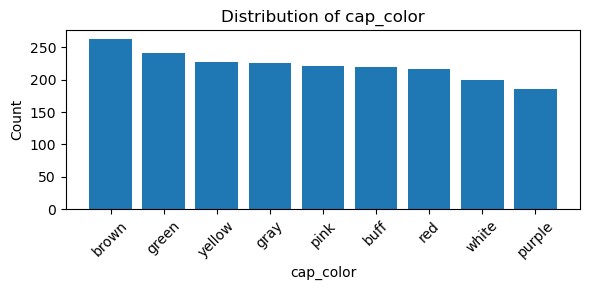

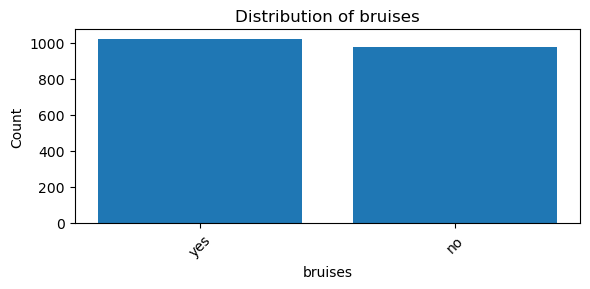

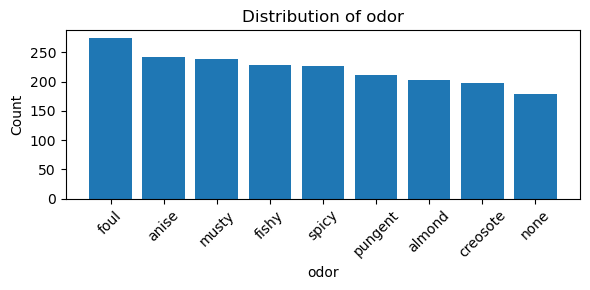

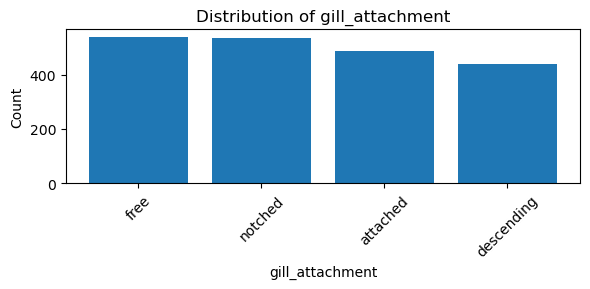

In [4]:
# 4. Feature distributions (bar plots for categorical features)
# Plot distributions for the first 6 features (excluding class)
features = df.columns[1:7]
for col in features:
    plt.figure(figsize=(6,3))
    vals = df[col].value_counts()
    plt.bar(vals.index.astype(str), vals.values)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [5]:
# 5. Association analysis between categorical variables using Cramér's V
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Compute Cramér's V for a subset of features to keep computation reasonable
cols = df.columns[:11]  # include class + 10 features
cramers = pd.DataFrame(index=cols, columns=cols, dtype=float)
for i in cols:
    for j in cols:
        cramers.loc[i,j] = cramers.loc[j,i] = cramers_v(df[i], df[j])
        
cramers = cramers.astype(float)
cramers.style.background_gradient(cmap='viridis')


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape
Unnamed: 0,1.000000,0.716438,0.716258,0.717157,0.715900,0.717157,0.716258,0.716079,0.715900,0.717698,0.715900
cap_shape,0.716438,1.000000,0.054748,0.082759,0.042468,0.099709,0.050050,0.067770,0.029022,0.112321,0.068903
cap_surface,0.716258,0.054748,1.000000,0.076566,0.034840,0.075501,0.055977,0.042875,0.047267,0.121764,0.000000
cap_color,0.717157,0.082759,0.076566,1.000000,0.047701,0.091255,0.054545,0.081200,0.103967,0.115696,0.096434
bruises,0.715900,0.042468,0.034840,0.047701,1.000000,0.073933,0.032525,0.017735,0.035382,0.125982,0.000000
odor,0.717157,0.099709,0.075501,0.091255,0.073933,1.000000,0.089454,0.059275,0.015371,0.102731,0.033658
gill_attachment,0.716258,0.050050,0.055977,0.054545,0.032525,0.089454,1.000000,0.067400,0.022699,0.055152,0.000000
gill_spacing,0.716079,0.067770,0.042875,0.081200,0.017735,0.059275,0.067400,1.000000,0.048089,0.089809,0.040071
gill_size,0.715900,0.029022,0.047267,0.103967,0.035382,0.015371,0.022699,0.048089,1.000000,0.116368,0.041073
gill_color,0.717698,0.112321,0.121764,0.115696,0.125982,0.102731,0.055152,0.089809,0.116368,1.000000,0.155774


In [6]:
# 6. Preprocessing: Encode categorical variables and split dataset
# Assume first column is target (class). We'll label-encode the target and one-hot encode features.
target_col = df.columns[0]
X = df.drop(columns=[target_col])
y = df[target_col]

# Label-encode target
le = LabelEncoder()
y_enc = le.fit_transform(y)
print('Target classes:', le.classes_)

# One-hot encode features (use pandas.get_dummies)
X_ohe = pd.get_dummies(X, drop_first=False)
print('After one-hot encoding shape:', X_ohe.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y_enc, test_size=0.2, random_state=42)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

# Scale features for SVM
scaler = StandardScaler(with_mean=False)  # with_mean=False because sparse-like one-hot might be used
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Target classes: [   0    1    2    3    4    5    8    9   10   11   14   15   16   17
   18   19   20   21   23   24   25   27   28   29   30   31   32   33
   34   35   36   37   38   39   40   41   42   43   45   46   48   50
   51   52   53   54   55   57   59   63   64   65   66   67   68   69
   70   71   72   73   74   76   77   78   79   80   81   82   83   84
   85   88   91   92   93   94   95   96   98  100  101  102  104  106
  107  108  109  114  115  116  117  119  121  122  125  127  128  129
  132  133  134  138  140  141  142  143  145  146  147  150  151  152
  153  156  157  158  160  161  162  163  164  165  166  167  168  169
  170  171  172  173  174  175  177  178  180  181  182  183  184  186
  187  189  190  191  192  194  195  196  197  199  200  201  202  203
  204  205  206  207  208  209  210  211  212  213  214  216  217  218
  219  221  222  223  224  225  226  227  228  229  231  232  234  235
  236  237  238  239  241  242  243  244  245  247  248  250 

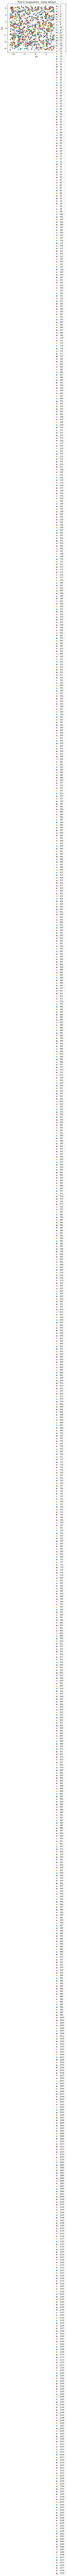

In [7]:
# 7. PCA to 2D for visualization of class separation
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_ohe)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

plt.figure(figsize=(6,5))
for label in np.unique(y_enc):
    idx = np.where(y_enc == label)
    plt.scatter(X_pca[idx,0], X_pca[idx,1], label=str(le.inverse_transform([label])[0]))
plt.legend()
plt.title('PCA (2 components) - entire dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [8]:
print("Columns:", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head())
print("\nUnique values in 'class' column:", df['class'].unique())
print("Number of unique values in 'class':", df['class'].nunique())


Columns: ['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat', 'class', 'stalk_height', 'cap_diameter']

First 5 rows:
    Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color stalk_shape stalk_root  \
0      distant  

In [10]:
# Target column is ONLY 'class'
y = df['class']              # edible or poisonous
X = df.drop('class', axis=1) # all other features

# Encode target
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
y_enc = le.fit_transform(y)   # now only 2 classes

# Encode features
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_enc = ohe.fit_transform(X)

print("y_enc unique values:", np.unique(y_enc))   # should be [0,1]
print("X_enc shape:", X_enc.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_enc, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)
# ---------------------------
# Train a model (Example: Logistic Regression)
# ---------------------------
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

y_enc unique values: [0 1]
X_enc shape: (2000, 3049)
Accuracy: 0.8475


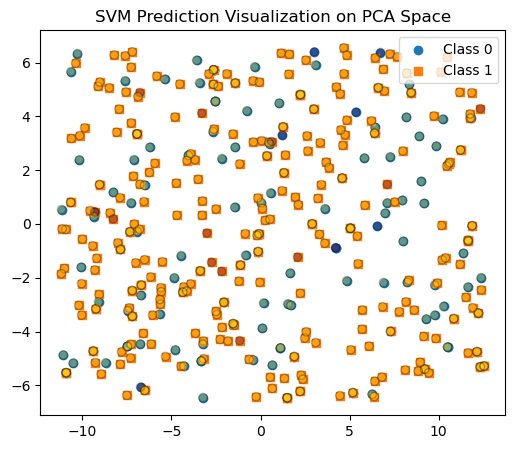

In [12]:
# Train SVM
from sklearn.svm import SVC

svc = SVC(kernel='rbf', gamma='scale', C=1.0)
svc.fit(X_train_scaled, y_train)

# Predict
y_pred_test = svc.predict(X_test_scaled)

# Visualization on PCA 2D
plt.figure(figsize=(6,5))
markers = ['o', 's']

for label, marker in zip(np.unique(y_test), markers):
    plt.scatter(X_test_pca[y_test == label, 0],
                X_test_pca[y_test == label, 1],
                marker=marker, label=f"Class {label}")

# Add predicted decision boundary points
plt.scatter(X_test_pca[:, 0],
            X_test_pca[:, 1],
            c=y_pred_test, alpha=0.3, edgecolor='k')

plt.legend()
plt.title("SVM Prediction Visualization on PCA Space")
plt.show()


In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
    {'kernel': ['poly'], 'C': [0.1, 1], 'degree': [2,3]}
]

# pass class_weight='balanced' in the estimator
grid = GridSearchCV(SVC(random_state=42, class_weight='balanced'),
                    param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train_scaled, y_train)

best = grid.best_estimator_
print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)

y_pred_best = best.predict(X_test_scaled)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Test accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best, zero_division=0))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_best))


Fitting 3 folds for each of 13 candidates, totalling 39 fits
Best params: {'C': 0.1, 'degree': 3, 'kernel': 'poly'}
Best CV score: 0.6055926808187703
Test accuracy: 0.6125
              precision    recall  f1-score   support

           0       0.33      0.28      0.30       120
           1       0.71      0.76      0.73       280

    accuracy                           0.61       400
   macro avg       0.52      0.52      0.52       400
weighted avg       0.59      0.61      0.60       400

Confusion matrix:
 [[ 33  87]
 [ 68 212]]


In [17]:
# 11. Compare kernels (linear, poly, rbf) with default/practical params
kernels = ['linear', 'poly', 'rbf']
results = []
for k in kernels:
    if k == 'poly':
        model = SVC(kernel=k, degree=3, C=1, random_state=42)
    else:
        model = SVC(kernel=k, C=1, random_state=42)
    model.fit(X_train_scaled, y_train)
    yp = model.predict(X_test_scaled)
    results.append({
        'kernel': k,
        'accuracy': accuracy_score(y_test, yp),
        'precision': precision_score(y_test, yp, average='weighted', zero_division=0),
        'recall': recall_score(y_test, yp, average='weighted', zero_division=0),
        'f1': f1_score(y_test, yp, average='weighted', zero_division=0)
    })

results_df = pd.DataFrame(results)
display(results_df)


,kernel,accuracy,precision,recall,f1
0,linear,0.7000,0.490000,0.7000,0.576471
1,poly,0.6550,0.603493,0.6550,0.616217
2,rbf,0.6925,0.623558,0.6925,0.607645


## Conclusion 

- This notebook performed EDA, encoded categorical features, trained SVM models, performed hyperparameter tuning, and compared kernel types.
